# Analyzing Fitbit Data in iPython

Using the Fitbit Python library I downloaded the Fitbit activity, calorie and weight data. This notebook then analyzes the data as a way to learn about iPython.

In [53]:
# This is required to get plots to display inline
%matplotlib inline
# Additional setup
%cd /Users/dane/src/fitbit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ldane=pd.read_csv('fb14-16_dane.csv', header=0,
                  names=['date', 'category', 'value'])
lcindy=pd.read_csv('fb14-16_cindy.csv', header=0,
                  names=['date', 'category', 'value'])
lcindy.head()

/Users/dane/src/fitbit


,date,category,value
0,2015-08-02,calories,2060.00
1,2015-08-02,distance,6.43
2,2014-02-19,steps,15857.00
3,2014-02-19,calories,2149.00
4,2014-02-19,distance,7.39


In [76]:
# Collect up steps
dane = pd.pivot_table(ldane, index='date', columns=['category'])
cindy = pd.pivot_table(lcindy, index='date', columns=['category'])
for i in [dane, cindy]:
    i['date'] = i.index
    i['year'] = i.date.apply(lambda x: int(x[:4]))

cindy.head()

value                               date  year
category   calories distance  steps weight                  
date                                                        
2012-12-15     2224     8.28  17442  153.0  2012-12-15  2012
2012-12-16     2529    10.94  23434    NaN  2012-12-16  2012
2012-12-17     1988     5.84  12473  153.9  2012-12-17  2012
2012-12-18     2178     6.15  13202  153.5  2012-12-18  2012
2012-12-19     2003     5.79  12330  153.4  2012-12-19  2012

In [78]:
# having an extra value in the index is ugly
for k in ['calories', 'distance', 'steps', 'weight']:
    dane[k] = dane['value',k]
    cindy[k] = cindy['value', k]
    
dane.drop('value', axis=1, inplace=True)
cindy.drop('value', axis=1, inplace=True)
dane.head()

,date,year,calories,distance,steps,weight
category,,,,,,
date,,,,,,
2012-11-01,2012-11-01,2012,2087,5.22,10663,NaN
2012-11-02,2012-11-02,2012,2316,5.43,11085,NaN
2012-11-03,2012-11-03,2012,2479,8.46,17284,NaN
2012-11-04,2012-11-04,2012,2298,5.41,11044,NaN
2012-11-05,2012-11-05,2012,1976,4.96,10131,NaN


In [57]:
print('Average distance per day was {:3.1f}/{:3.1f} miles for dane/cindy'.format(np.average(dane['distance']),np.average(cindy['distance'])))

Average distance per day was 8.1/8.0 miles for dane/cindy


In [58]:
print('The most steps in a day was: {}/{} for dane/cindy'.format(max(dane['steps']), max(cindy['steps'])))

The most steps in a day was: 43958.0/44847.0 for dane/cindy


In [74]:
# Basic Stats
for n, i in [('Cindy', cindy), ('Dane', dane)]:
    print('{}'.format(n.title()))
    print('  Average steps: {:,}'.format(int(i.steps.mean())))
    print('  Total steps: {:,}'.format(i.steps.sum()))
    print('  Total distance: {:,}'.format(int(i.distance.sum())))
    

Cindy
  Average steps: 17,042
  Total steps: 25,171,339.0
  Total distance: 11,782
Dane
  Average steps: 16,706
  Total steps: 25,410,988.0
  Total distance: 12,358


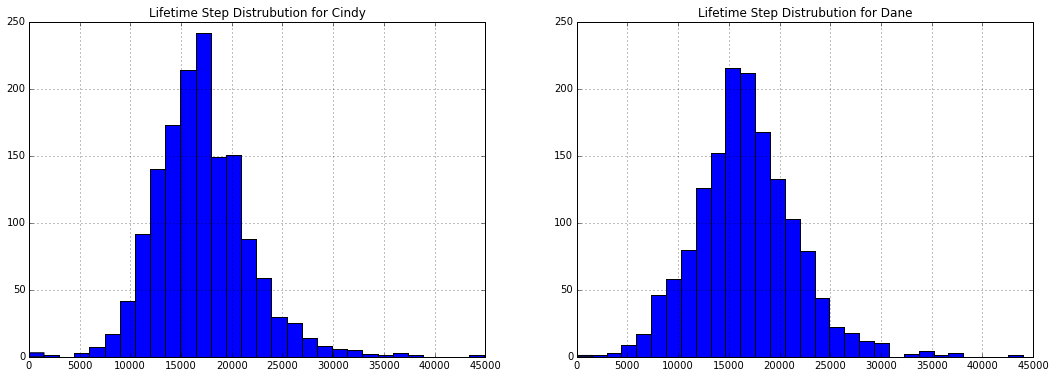

In [79]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
cindy['steps'].hist(bins=30)
plt.title('Lifetime Step Distrubution for Cindy')
plt.subplot(122)
dane['steps'].hist(bins=30)
plt.title('Lifetime Step Distrubution for Dane')
plt.show()


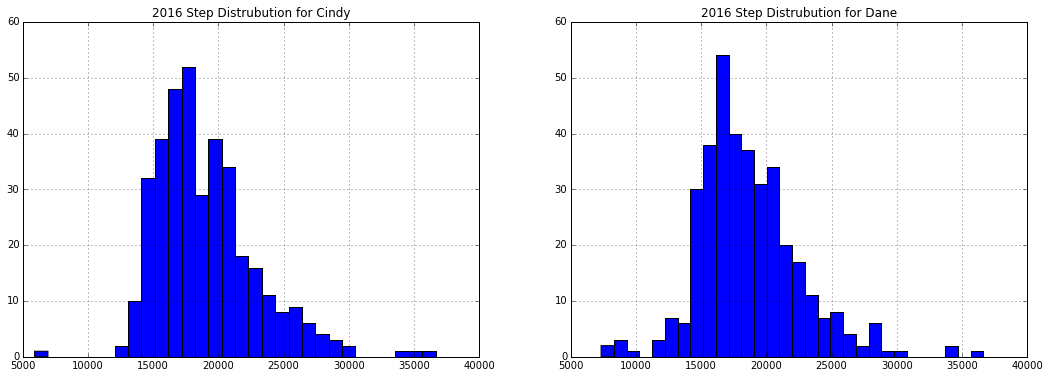

In [84]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(121) # numrows, numcols, fignum
cindy[cindy.year==2016]['steps'].hist(bins=30)
plt.title('2016 Step Distrubution for Cindy')
plt.subplot(122)
dane[dane.year==2016]['steps'].hist(bins=30)
plt.title('2016 Step Distrubution for Dane')
plt.show()


In [87]:
# Basic Stats
for n, i in [('Cindy', cindy), ('Dane', dane)]:
    print('{}'.format(n.title()))
    for y in [2013, 2014, 2015, 2016]:
        d = i[i.year == y]
        print('  Average steps for {}: {:,}'.format(y, int(d['steps'].mean())))


Cindy
  Average steps for 2013: 13,820
  Average steps for 2014: 17,735
  Average steps for 2015: 17,726
  Average steps for 2016: 19,002
Dane
  Average steps for 2013: 13,691
  Average steps for 2014: 18,049
  Average steps for 2015: 17,243
  Average steps for 2016: 18,665


In [89]:
cindy16 = cindy[cindy.year==2016]
cindy16.head(1)

,date,year,calories,distance,steps,weight
category,,,,,,
date,,,,,,
2016-01-01,2016-01-01,2016,1981,7.61,16331,137


In [90]:
min(cindy16.date)

'2016-01-01'

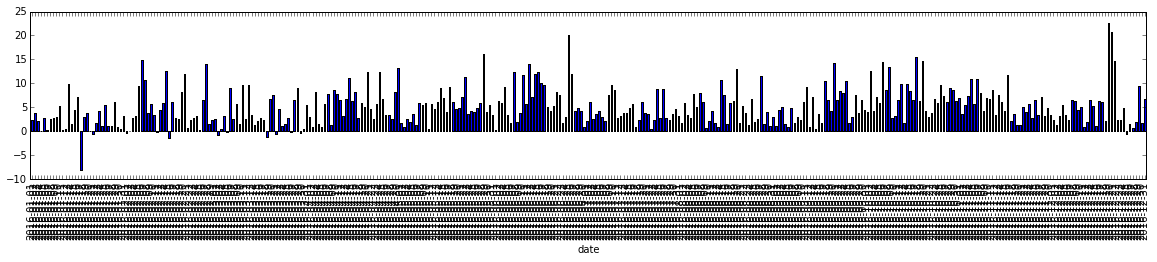

In [91]:
ou = (cindy16.steps - 14000)/1000
fig = plt.gcf()
fig.set_size_inches(20,3)
ou.plot(kind='bar')


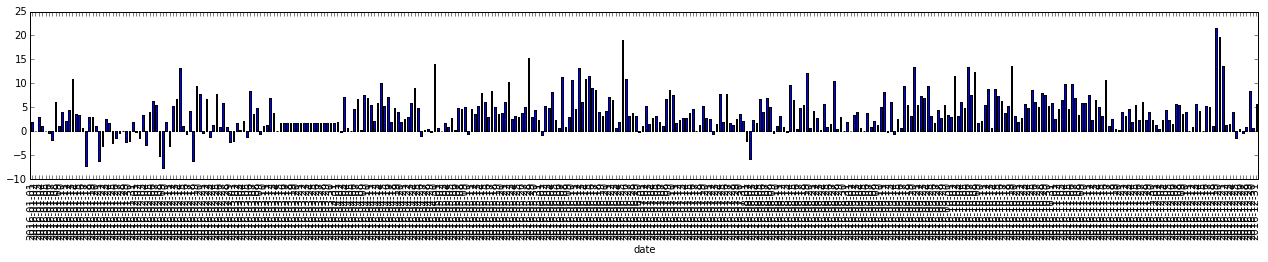

In [92]:
dane16 = dane[i.year==2016]
ou = (dane16.steps - 15000)/1000
fig = plt.gcf()
fig.set_size_inches(22,3)
ou.plot(kind='bar')

In [95]:
missed = cindy16[cindy16.steps < 14000]
print('Cindy was below 14K steps on {} days'.format(len(missed)))
print('Dane was below 14K steps pn {} days'.format(len(dane16[dane16.steps < 14000])))

Cindy was below 14K steps on 12 days
Dane was below 14K steps pn 21 days


In [113]:
cindy16.is_copy = False
dane16.is_copy = False
cindy16['goalmet'] = np.where(cindy16.steps > 14000, 1, -1)
dane16['goalmet'] = np.where(dane16.steps > 14000, 1, -1)
dane16.head()

,date,year,calories,distance,steps,weight,goalmet
category,,,,,,,
date,,,,,,,
2016-01-01,2016-01-01,2016,2605,8.30,16941,161.0,1
2016-01-02,2016-01-02,2016,2533,7.33,14963,160.6,1
2016-01-03,2016-01-03,2016,2720,8.80,17979,160.1,1
2016-01-04,2016-01-04,2016,2538,7.87,16071,158.3,1
2016-01-05,2016-01-05,2016,2460,7.38,15074,158.4,1


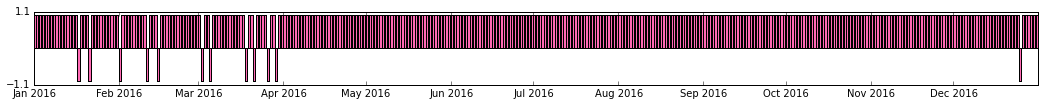

In [107]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
cindy16.index=pd.to_datetime(x.date,format='%Y-%m-%d')
plt.bar(cindy16.index, cindy16.goalmet, color='hotpink')
plt.yticks([-1.1,1.1])
plt.show()

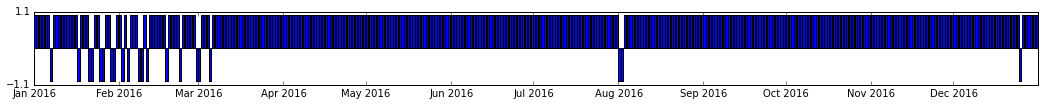

In [114]:
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.figure(1)
plt.subplot(411)
dane16.index=pd.to_datetime(dane16.date,format='%Y-%m-%d')
plt.bar(dane16.index, dane16.goalmet, color='blue')
plt.yticks([-1.1,1.1])
plt.show()

In [115]:
dane16.index[0]

Timestamp('2016-01-01 00:00:00')

In [118]:
datetime.week(dane16.index[0])

AttributeError: module 'datetime' has no attribute 'week'

In [117]:
import datetime